## Is our inference unbiased?

In this notebook, we investigate whether our inference pipelines display a bias. To do that, we run the pipelines $N$ times, drawing uniformly a fiducial value of $H_0 \in [20, 140] \, \rm{km} \, \rm{s}^{-1} \, \rm{Mpc}^{-1}$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from catalog.utils import GalaxyCatalog
from inference.pp_analysis import PPAnalysisPerfectRedshift, PPAnalysisFullInference, plot_sigma

In [2]:
n_H0 = 200
n_pp = 100
H0_array = np.linspace(20., 140., n_H0)
c_values = [0.1, 0.2, 0.3]

# Galaxy and GW parameters
n_gw = 200
n_z = 2000
z_max = 1.4
n_dir = 5
n_min = 1000
n_gw_per_dir = 40
alpha = np.radians(2)

filename = "./catalog/output.hdf5"
catalog = GalaxyCatalog(filename)

In [3]:
z_gal = catalog.draw_redshifts(n_dir, alpha, n_min)
z_min = min([np.min(z_gal_i) for z_gal_i in z_gal])
z = np.linspace(z_min, z_max, n_z)
ci_arr = np.linspace(0., 0.99, 1000)

output_data_filename = "data/pp_analysis.hdf5"

For each drawn value of fiducial $H_0$, we collect the minimal symmetric credible interval (CI) within which it lies. We then plot a cumulative histogram: for each percentile $\alpha$, the corresponding fraction of the $N$ inference runs for which the true $H_0$ lied within the $\alpha$-CI.

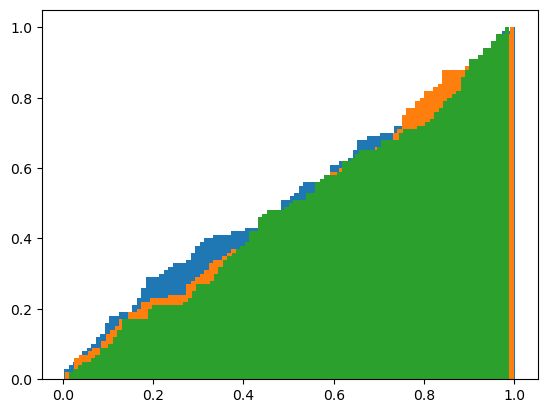

In [4]:
pp_analysis = PPAnalysisPerfectRedshift(n_pp)
pp_data = []
for c in c_values:
    pp_analysis.run_inference(H0_array, z_gal, n_gw, n_dir, c)
    counts, bins = pp_analysis.make_histplot()
    pp_data.append((counts, bins))
    pp_analysis.save_data(filename=output_data_filename, dataset=f"perfect_redshift/c_{c}")

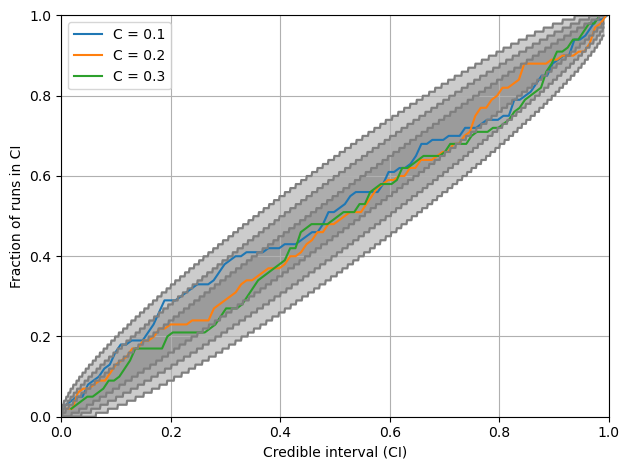

In [5]:
fig, ax = plt.subplots()
for (counts, bins), c in zip(pp_data, c_values):
    pp_analysis.plot(ax, counts, bins, label=f"C = {c}")

plot_sigma(ax, n_pp, ci_arr)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.legend(loc=2)
fig.tight_layout()
fig.savefig('figures/pp-analysis-perfect-redshift.png', dpi=400)
plt.show()

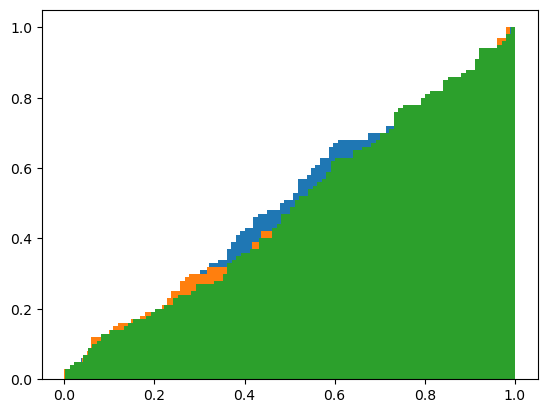

In [6]:
pp_analysis = PPAnalysisFullInference(n_pp)
pp_data = []
for c in c_values:
    pp_analysis.run_inference(H0_array, z, z_gal, n_gw, n_dir, c)
    counts, bins = pp_analysis.make_histplot()
    pp_data.append((counts, bins))
    pp_analysis.save_data(filename=output_data_filename, dataset=f"full_inference/c_{c}")

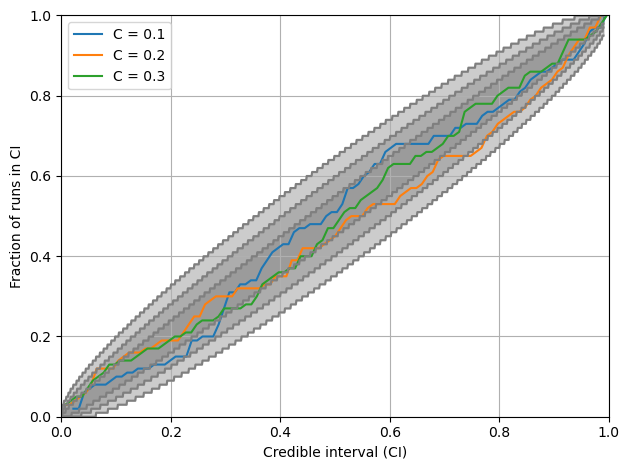

In [7]:
fig, ax = plt.subplots()
for (counts, bins), c in zip(pp_data, c_values):
    pp_analysis.plot(ax, counts, bins, label=f"C = {c}")

plot_sigma(ax, n_pp, ci_arr)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.legend(loc=2)
fig.tight_layout()
fig.savefig('figures/pp-analysis-full-inference.png', dpi=400)
plt.show()